# Day 11 - 

https://adventofcode.com/2018/day/11

In [27]:
def powerLevel(x,y,serial):
    # Find the fuel cell's rack ID, which is its X coordinate plus 10.
    rackID = x+10
    # Begin with a power level of the rack ID times the Y coordinate.
    power = rackID*y
    # Increase the power level by the value of the grid serial number (your puzzle input).
    power += serial
    # Set the power level to itself multiplied by the rack ID.
    power *= rackID
    # Keep only the hundreds digit of the power level (so 12345 becomes 3; numbers with no hundreds digit become 0).
    power = ( power % 1000 - power % 100 ) // 100
    # Subtract 5 from the power level.
    return power - 5

In [28]:
print(powerLevel(3,5,8)) # 4
print(powerLevel(122,79,57)) # -5
print(powerLevel(217,196,39)) # 0
print(powerLevel(101,153,71)) # 4

4
-5
0
4


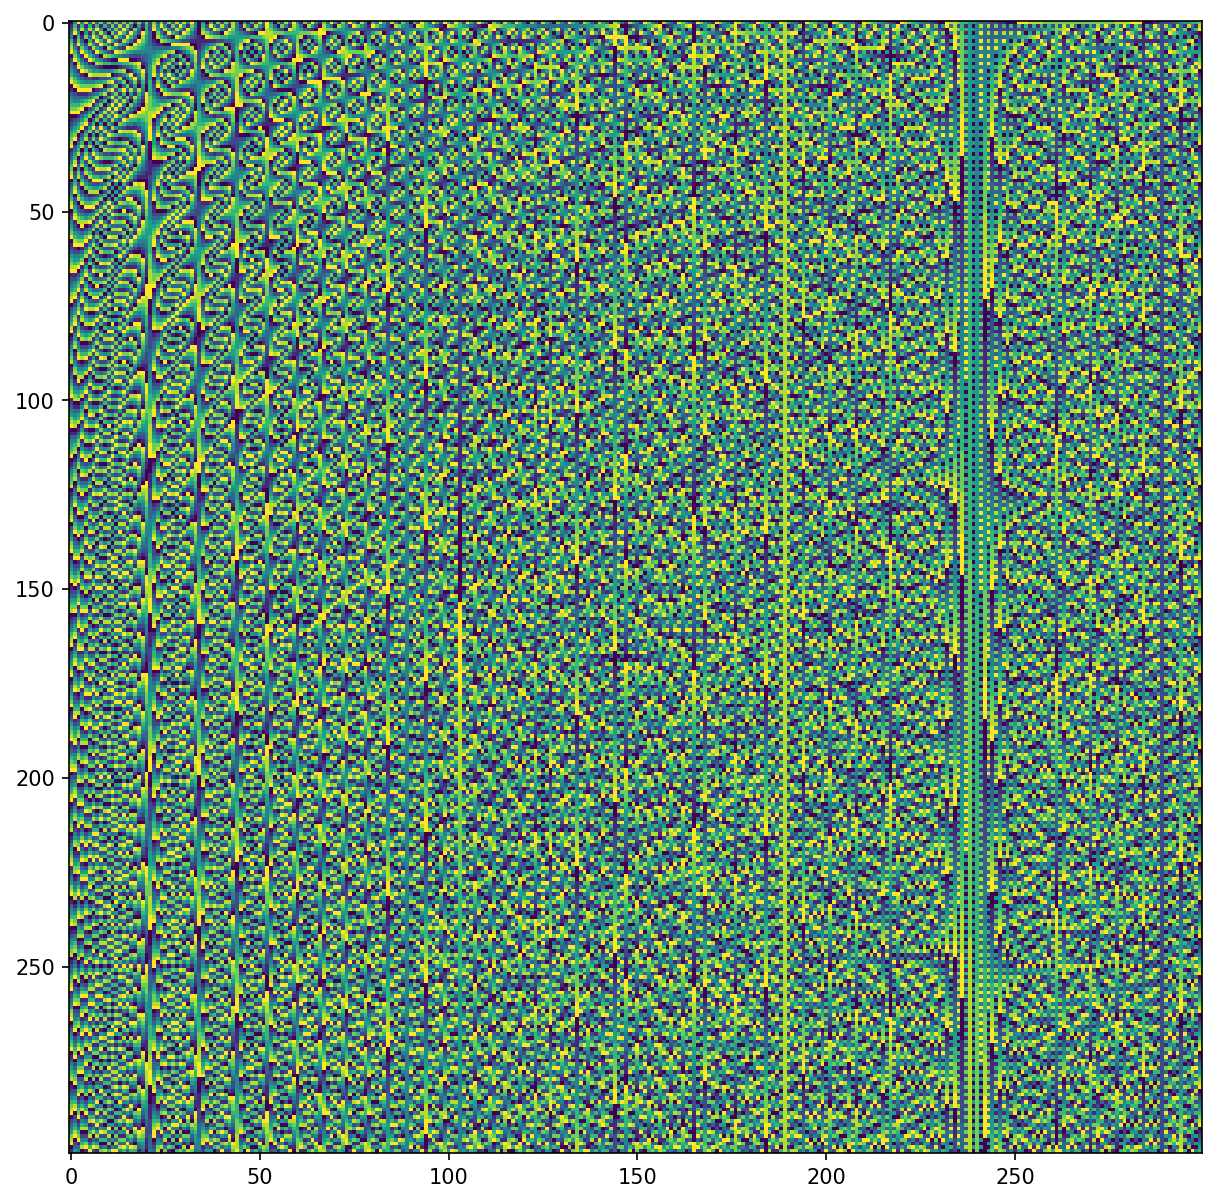

In [230]:
import numpy as np
import matplotlib.pyplot as plt

grid = np.zeros((300,300),dtype=int)

# Each fuel cell has a coordinate ranging from 1 to 300 

#serial = 18
serial = 8444

for x in range(1,301):
    for y in range(1,301):
        grid[y-1][x-1] = powerLevel(x,y,serial=serial)
        
plt.figure(figsize=(10,10),dpi=150)
s = plt.imshow(grid)      

In [231]:
xmax = 0
ymax = 0
pmax = -1e32
for x in range(1,303-3):
    for y in range (1,303-3):
        p = sum(sum(grid[y-1:y-1+3,x-1:x-1+3]))
        if p > pmax:
            pmax = p
            xmax = x
            ymax = y

print("(X,Y) = {},{} (Pmax = {})".format(xmax,ymax,pmax))

(X,Y) = 243,68 (Pmax = 28)


## Part 2 brute force

In [88]:
xmax = 0
ymax = 0
smax = 0
pmax = -1e32

for s in range(1,301):
    for x in range(1,301-s):
        for y in range (1,301-s):
            p = sum(sum(grid[y-1:y-1+s,x-1:x-1+s]))
            if p > pmax:
                pmax = p
                xmax = x
                ymax = y
                smax = s

print("(X,Y,Z) = {},{},{} (Pmax = {})".format(xmax,ymax,smax,pmax))

(X,Y,Z) = 236,252,12 (Pmax = 96)


## Part 2 using summed-area table

https://en.wikipedia.org/wiki/Summed-area_table

In [232]:
sums = np.zeros((301,301),dtype=int)

print("Computing summed-area table...",end=" ")

for x in range(0,301):
    for y in range(0,301):
        if x==0 or y==0:
            sums[y][x] = 0 # external top left border  
        else:
            sums[y][x] = sum(sum(grid[:y,:x]))

print("done.")

print("Searching for largest sum area...")

xmax = 0
ymax = 0
smax = 0
pmax = -1e32

def sumSquare(x,y,s):
    return sums[y+s-1][x+s-1] + sums[y-1][x-1] - sums[y-1][x+s-1] - sums[y-1+s][x-1]
  
for s in range(1,301):
    for x in range(1,301-s):
        for y in range (1,301-s):
            p = sumSquare(x,y,s)
            if p > pmax:
                pmax = p
                xmax = x
                ymax = y
                smax = s

print("(X,Y,Z) = {},{},{} (Pmax = {})".format(xmax,ymax,smax,pmax))

Computing summed-area table... done.
Searching for largest sum area...
(X,Y,Z) = 236,252,12 (Pmax = 96)
